
Ishaan Raina 230968080



Q1. Implementation and Comparison of CNN Architectures

## Cats and Dogs Dataset

In [22]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("Cats folder exists:", os.path.exists(os.path.join(train_dir, 'cats')))
print("Dogs folder exists:", os.path.exists(os.path.join(train_dir, 'dogs')))

Cats folder exists: True
Dogs folder exists: True


In [24]:
import os
import shutil
import random

def create_test_set(source_dir, test_dir, category, num_images=150):
    source_cat_dir = os.path.join(source_dir, category)
    test_cat_dir = os.path.join(test_dir, category)
    os.makedirs(test_cat_dir, exist_ok=True)

    # List all images
    images = os.listdir(source_cat_dir)
    # Shuffle and select a subset
    selected_images = random.sample(images, num_images)

    for img in selected_images:
        src_path = os.path.join(source_cat_dir, img)
        dst_path = os.path.join(test_cat_dir, img)
        shutil.move(src_path, dst_path)
    print(f"Moved {num_images} images of {category} to test set.")

# Paths
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, '/content/cats_and_dogs_filtered/train')
test_dir = os.path.join(base_dir,'/content/cats_and_dogs_filtered/test')

# Create test set with ~150 images each
create_test_set(train_dir, test_dir, 'cats', num_images=150)
create_test_set(train_dir, test_dir, 'dogs', num_images=150)


Moved 150 images of cats to test set.
Moved 150 images of dogs to test set.


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'
test_dir = '/content/cats_and_dogs_filtered/test'

# Data augmentation & rescaling
train_datagen_cd = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Generators (with 128x128 size)
train_generator = train_datagen_cd.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

from tensorflow.keras import regularizers

model_lenet_big = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (5,5), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (5,5), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.AveragePooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lenet_big.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Train model
history_lenet = model_lenet_big.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluate on test data
test_loss, test_acc = model_lenet_big.evaluate(test_generator)
print(f"LeNet-5 (Scaled) Test Accuracy: {test_acc:.4f}")

Found 1700 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 562 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.4913 - loss: 1.3690 - val_accuracy: 0.5000 - val_loss: 0.9770
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.4822 - loss: 0.9366 - val_accuracy: 0.5000 - val_loss: 0.8460
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4953 - loss: 0.8313 - val_accuracy: 0.5000 - val_loss: 0.7969
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.4966 - loss: 0.7895 - val_accuracy: 0.5000 - val_loss: 0.7711
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5054 - loss: 0.7674 - val_accuracy: 0.5120 - val_loss: 0.7565
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5325 - loss: 0.7536 - val_accuracy: 0.5040 - val_loss: 0.7470
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5317 - loss: 0.7488 - val_accuracy: 0.5400 - val_loss: 0.7387
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5413 - loss: 0.7390 - val_accuracy: 0.5610 - val_loss:

In [26]:
from tensorflow.keras import layers, models, regularizers

def build_alexnet(input_shape=(128, 128, 3), num_classes=1):
    model = models.Sequential()


    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    model.add(layers.Conv2D(256, (5, 5), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))

    model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))

    model.add(layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model


alexnet_model = build_alexnet()

alexnet_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

alexnet_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 30, 30, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,732,417 (94.35 MB)

 Trainable params: 24,731,713 (94.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [27]:
# AlexNet Model for 128x128 images
model_alexnet = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(96, (11, 11), strides=4, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_alexnet.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


history_alexnet = model_alexnet.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

test_loss_alex, test_acc_alex = model_alexnet.evaluate(test_generator)
print(f"AlexNet Test Accuracy: {test_acc_alex:.4f}")


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.5087 - loss: 1.8958 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5779 - loss: 0.6907 - val_accuracy: 0.5070 - val_loss: 0.6929
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5238 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4879 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5008 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4924 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4938 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5270 - loss: 0.6927 - val_accuracy: 0.5000 -


📊 Model Performance Comparison:
              Model  Test Accuracy  Test Loss
0  LeNet-5 (Scaled)       0.743772   0.685209
1           AlexNet       0.491103   0.693153


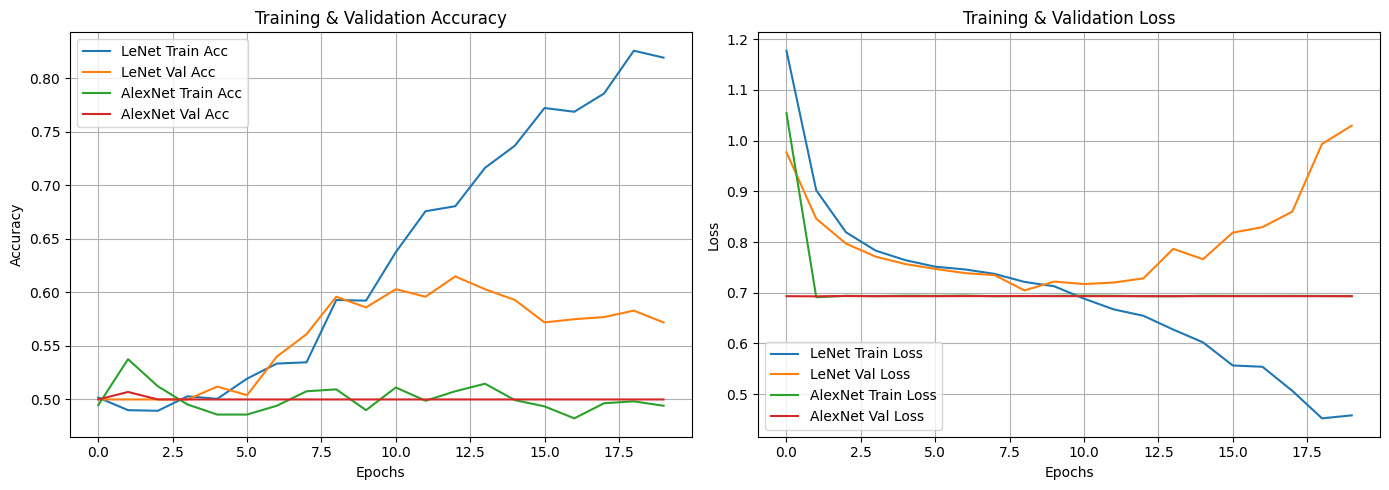


🔍 Accuracy Difference (AlexNet - LeNet): -25.27%


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["LeNet-5 (Scaled)", "AlexNet"],
    "Test Accuracy": [test_acc, test_acc_alex],
    "Test Loss": [test_loss, test_loss_alex]
})
print("\n📊 Model Performance Comparison:")
print(comparison_df)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lenet.history['accuracy'], label='LeNet Train Acc')
plt.plot(history_lenet.history['val_accuracy'], label='LeNet Val Acc')
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Train Acc')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_lenet.history['loss'], label='LeNet Train Loss')
plt.plot(history_lenet.history['val_loss'], label='LeNet Val Loss')
plt.plot(history_alexnet.history['loss'], label='AlexNet Train Loss')
plt.plot(history_alexnet.history['val_loss'], label='AlexNet Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

diff = (test_acc_alex - test_acc) * 100
print(f"\n🔍 Accuracy Difference (AlexNet - LeNet): {diff:.2f}%")


## Horse2Zebra

In [ ]:
!pip install rarfile
import os
import shutil
import rarfile

# Paths (update with your file locations)
trainA_rar = "/content/testA.rar"
testA_rar = "/content/testB.rar"
trainB_rar = "/content/trainA.rar"
testB_rar = "/content/trainB.rar"

output_dir = "dataset"

# Temporary extraction folder
temp_extract = "temp_extract"
os.makedirs(temp_extract, exist_ok=True)

def extract_and_move(rar_path, target_dir):
    """Extract a RAR file and move images to target directory"""
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(temp_extract)

    # Find extracted folder (sometimes RARs have subfolders)
    for root, _, files in os.walk(temp_extract):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                src = os.path.join(root, file)
                dest = os.path.join(target_dir, file)
                shutil.move(src, dest)

    # Cleanup temp folder
    shutil.rmtree(temp_extract)
    os.makedirs(temp_extract, exist_ok=True)

# Create target directories
os.makedirs(os.path.join(output_dir, "train/horse"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train/zebra"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/horse"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/zebra"), exist_ok=True)

# Extract horse datasets
extract_and_move(trainA_rar, os.path.join(output_dir, "train/horse"))
extract_and_move(testA_rar, os.path.join(output_dir, "test/horse"))

# Extract zebra datasets
extract_and_move(trainB_rar, os.path.join(output_dir, "train/zebra"))
extract_and_move(testB_rar, os.path.join(output_dir, "test/zebra"))

print(" Dataset reorganized successfully!")


KeyboardInterrupt: 

# RAR FILE ALDEADY CREATED, EXECUTED THIS TWICE, HENCE THIS ERROR

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# Image size (we'll adjust per model later)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

print("Class indices:", train_data.class_indices)


Found 1187 images belonging to 2 classes.
Found 1474 images belonging to 2 classes.
Class indices: {'horse': 0, 'zebra': 1}


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input

def LeNet5(input_shape=(32,32,3), num_classes=2):
    model = Sequential([
        Input(shape=input_shape),                         # Explicit Input layer
        Conv2D(6, kernel_size=(5,5), activation="relu"),
        AveragePooling2D(pool_size=(2,2)),
        Conv2D(16, kernel_size=(5,5), activation="relu"),
        AveragePooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(120, activation="relu"),
        Dense(84, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

# Build model
lenet = LeNet5(input_shape=(32,32,3))
lenet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Training
history_lenet = lenet.fit(
    train_datagen.flow_from_directory(train_dir, target_size=(32,32), batch_size=32, class_mode="categorical"),
    validation_data=test_datagen.flow_from_directory(test_dir, target_size=(32,32), batch_size=32, class_mode="categorical"),
    epochs=10
)



Found 1187 images belonging to 2 classes.
Found 1474 images belonging to 2 classes.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9200 - loss: 0.4106 - val_accuracy: 0.9050 - val_loss: 0.3204
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.8947 - loss: 0.3498 - val_accuracy: 0.9050 - val_loss: 0.3178
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9021 - loss: 0.3277 - val_accuracy: 0.9050 - val_loss: 0.3180
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8876 - loss: 0.3686 - val_accuracy: 0.9050 - val_loss: 0.3184
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8904 - loss: 0.3518 - val_accuracy: 0.9050 - val_loss: 0.3170
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9045 - loss: 0.3279 - val_accuracy: 0.9050 - val_loss: 0.3339
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8969 - loss: 0.3522 - val_accuracy: 0.9050 - val_loss: 0.3174
Epoch 8/10
38/38 ━━━

In [20]:
from tensorflow.keras.layers import MaxPooling2D, Dropout

def AlexNet(input_shape=(227,227,3), num_classes=2):
    model = Sequential([
        Conv2D(96, kernel_size=11, strides=4, activation="relu", input_shape=input_shape),
        MaxPooling2D(pool_size=3, strides=2),

        Conv2D(256, kernel_size=5, padding="same", activation="relu"),
        MaxPooling2D(pool_size=3, strides=2),

        Conv2D(384, kernel_size=3, padding="same", activation="relu"),
        Conv2D(384, kernel_size=3, padding="same", activation="relu"),
        Conv2D(256, kernel_size=3, padding="same", activation="relu"),
        MaxPooling2D(pool_size=3, strides=2),

        Flatten(),
        Dense(4096, activation="relu"),
        Dropout(0.5),
        Dense(4096, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ])
    return model

alexnet = AlexNet()
alexnet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history_alex = alexnet.fit(
    train_datagen.flow_from_directory(train_dir, target_size=(227,227), batch_size=32, class_mode="categorical"),
    validation_data=test_datagen.flow_from_directory(test_dir, target_size=(227,227), batch_size=32, class_mode="categorical"),
    epochs=10
)


Found 1187 images belonging to 2 classes.
Found 1474 images belonging to 2 classes.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 615ms/step - accuracy: 0.8600 - loss: 1.5808 - val_accuracy: 0.9050 - val_loss: 0.3145
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 552ms/step - accuracy: 0.8986 - loss: 0.3329 - val_accuracy: 0.9050 - val_loss: 0.3148
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 574ms/step - accuracy: 0.8955 - loss: 0.3446 - val_accuracy: 0.9050 - val_loss: 0.3143
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.8996 - loss: 0.3297 - val_accuracy: 0.9050 - val_loss: 0.3141
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.9063 - loss: 0.3132 - val_accuracy: 0.9050 - val_loss: 0.3140
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 541ms/step - accuracy: 0.8990 - loss: 0.3310 - val_accuracy: 0.9050 - val_loss: 0.3337
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 488ms/step - accuracy: 0.9108 - loss: 0.3245 - val_accuracy: 0.9050 - val_loss: 0.3150
Epoch 8/10
38

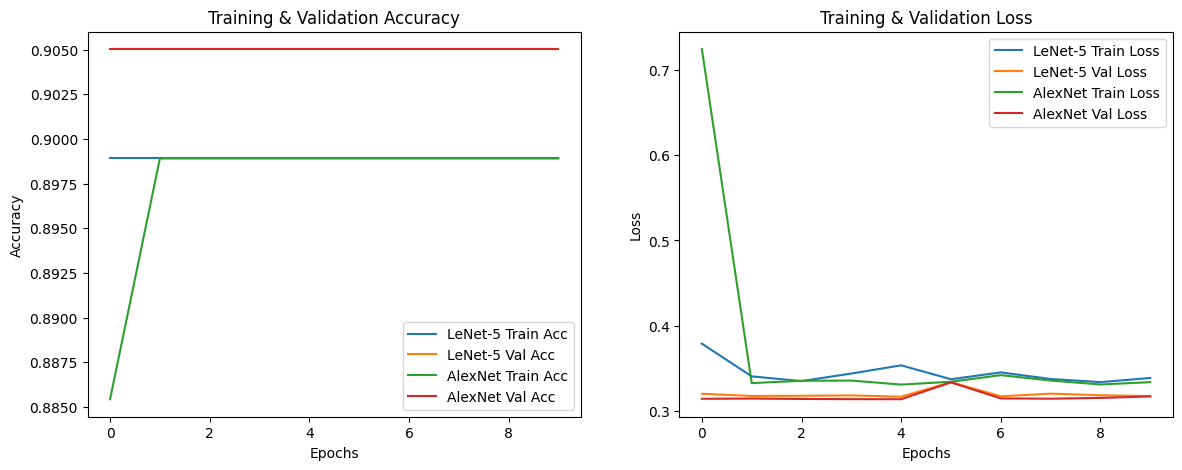

In [33]:
def plot_comparison(history1, history2, label1="Model1", label2="Model2"):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history1.history['accuracy'], label=f'{label1} Train Acc')
    plt.plot(history1.history['val_accuracy'], label=f'{label1} Val Acc')
    plt.plot(history2.history['accuracy'], label=f'{label2} Train Acc')
    plt.plot(history2.history['val_accuracy'], label=f'{label2} Val Acc')
    plt.title("Training & Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history1.history['loss'], label=f'{label1} Train Loss')
    plt.plot(history1.history['val_loss'], label=f'{label1} Val Loss')
    plt.plot(history2.history['loss'], label=f'{label2} Train Loss')
    plt.plot(history2.history['val_loss'], label=f'{label2} Val Loss')
    plt.title("Training & Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Call function
plot_comparison(history_lenet, history_alex, label1="LeNet-5", label2="AlexNet")

# Q2. Transfer Learning and Model Performance Analysis
## Train, test, and report the performance of the following PRE-TRAINED IMAGENET models
## on the Cats and Dogs Dataset` and Horse2Zebra Dataset.
## A) VGG-16
## B) GoogleNet
## C) ResNet50
## D) EfficientNetB0
## E) MobileNetV2

In [34]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def load_dataset(base_dir, use_validation=False):
    datagen = ImageDataGenerator(rescale=1./255)

    train_data = datagen.flow_from_directory(
        base_dir + "/train",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode="categorical"
    )

    if use_validation:
        val_data = datagen.flow_from_directory(
            base_dir + "/validation",
            target_size=IMG_SIZE,
            batch_size=BATCH_SIZE,
            class_mode="categorical"
        )
    else:
        val_data = None

    test_data = datagen.flow_from_directory(
        base_dir + "/test",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        shuffle=False
    )

    return train_data, val_data, test_data


In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, EfficientNetB0, MobileNetV2

def build_model(base_model, num_classes=2):
    # Freeze base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classifier
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    preds = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=preds)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [36]:
def get_models(input_shape=(224,224,3), num_classes=2):
    return {
        "VGG16": build_model(VGG16(weights="imagenet", include_top=False, input_shape=input_shape), num_classes),
        "GoogleNet": build_model(InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape), num_classes),
        "ResNet50": build_model(ResNet50(weights="imagenet", include_top=False, input_shape=input_shape), num_classes),
        "EfficientNetB0": build_model(EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape), num_classes),
        "MobileNetV2": build_model(MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape), num_classes),
    }


In [37]:
import matplotlib.pyplot as plt

def train_and_evaluate(models, train_data, val_data, test_data, epochs=5):
    histories = {}
    results = {}

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        history = model.fit(
            train_data,
            validation_data=val_data if val_data else test_data,
            epochs=epochs,
            verbose=1
        )
        histories[name] = history

        # Evaluate
        loss, acc = model.evaluate(test_data, verbose=0)
        results[name] = {"accuracy": acc, "loss": loss}

    return histories, results


In [38]:
def plot_histories(histories):
    plt.figure(figsize=(14,6))

    # Accuracy
    plt.subplot(1,2,1)
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    for name, history in histories.items():
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title("Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


Found 1187 images belonging to 2 classes.
Found 1474 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

🔹 Training VGG16...
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 555ms/step - accuracy: 0.8678 - loss: 0.4063 - val_accuracy: 0.9050 - val_loss: 0.3143
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 384ms/step - accuracy: 0.8951 - loss: 0.3645 - val_accuracy: 0.9050 - val_loss: 0.3185
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.9030 - loss: 0.3163 - val_accuracy: 0.9050 - val_loss: 0.3163
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 403ms/step - accuracy: 0.8957 - loss: 0.3345 - val_accuracy: 0.9050 - val_loss: 0.3171
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - accuracy: 0.8922 - loss: 0.3605 - val_accuracy: 0.9050 - val_loss: 0.3181

🔹

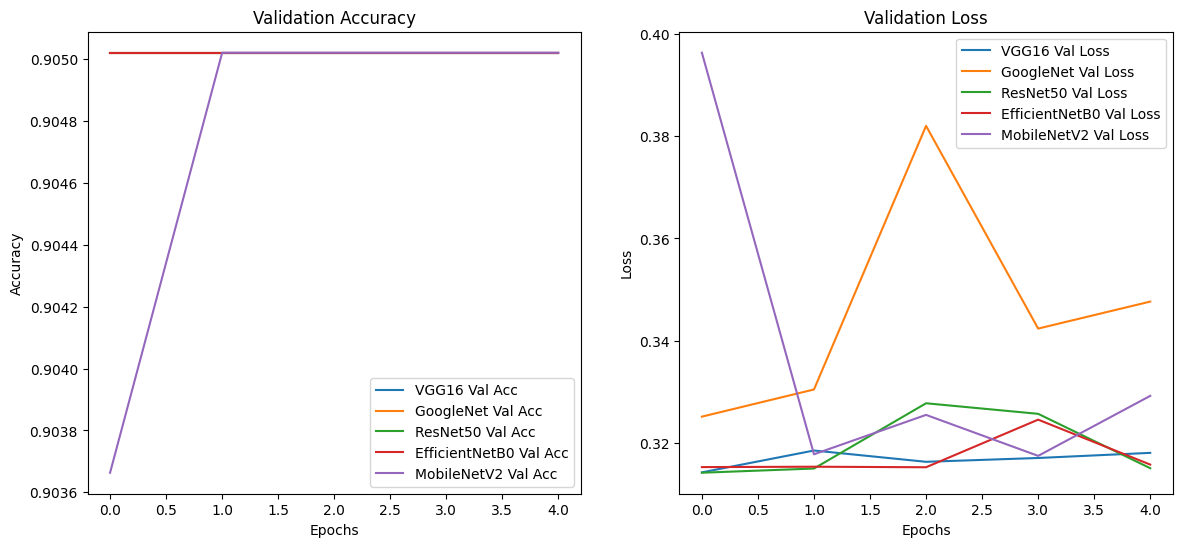

Horse vs Zebra Results: {'VGG16': {'accuracy': 0.9050203561782837, 'loss': 0.31808963418006897}, 'GoogleNet': {'accuracy': 0.9050203561782837, 'loss': 0.34766149520874023}, 'ResNet50': {'accuracy': 0.9050203561782837, 'loss': 0.31509214639663696}, 'EfficientNetB0': {'accuracy': 0.9050203561782837, 'loss': 0.3157978057861328}, 'MobileNetV2': {'accuracy': 0.9050203561782837, 'loss': 0.32923316955566406}}
Found 1700 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 562 images belonging to 2 classes.

🔹 Training VGG16...
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 466ms/step - accuracy: 0.5810 - loss: 0.7155 - val_accuracy: 0.8260 - val_loss: 0.4238
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.8075 - loss: 0.4333 - val_accuracy: 0.8830 - val_loss: 0.3204
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.8667 - loss: 0.3277 - val_accuracy: 0.8770 - val_loss: 0.3008
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - accuracy: 

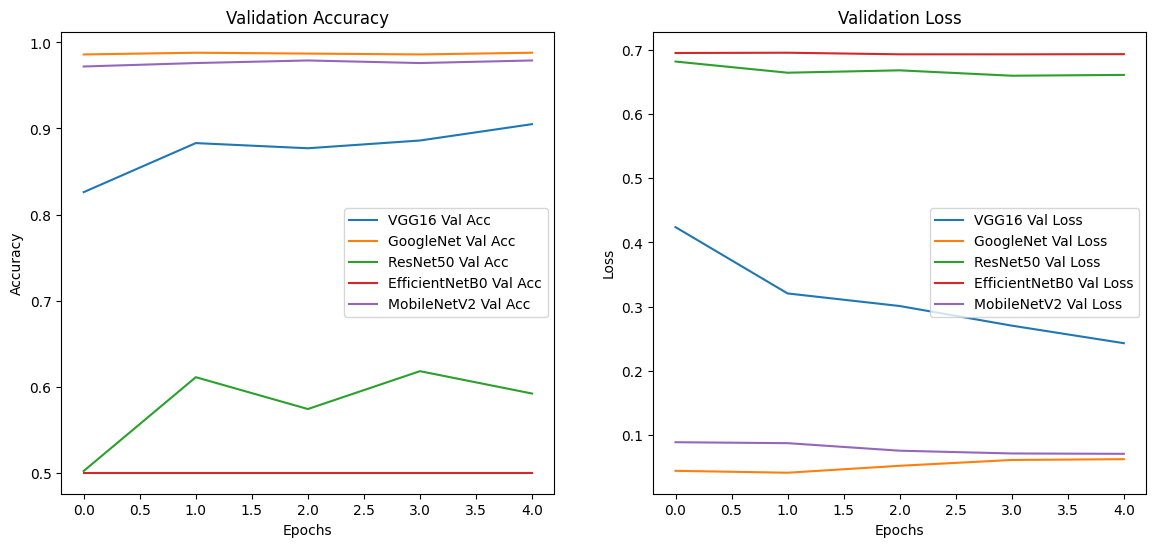

Cats vs Dogs Results: {'VGG16': {'accuracy': 0.9145907759666443, 'loss': 0.2301677018404007}, 'GoogleNet': {'accuracy': 1.0, 'loss': 0.0065428828820586205}, 'ResNet50': {'accuracy': 0.6174377202987671, 'loss': 0.6598745584487915}, 'EfficientNetB0': {'accuracy': 0.5088967680931091, 'loss': 0.6930031776428223}, 'MobileNetV2': {'accuracy': 0.9911032319068909, 'loss': 0.03189745172858238}}


In [39]:
# Horses vs Zebras (only train/test)
train_data, _, test_data = load_dataset("/content/dataset", use_validation=False)
models_hz = get_models(num_classes=2)
histories_hz, results_hz = train_and_evaluate(models_hz, train_data, None, test_data, epochs=5)
plot_histories(histories_hz)
print("Horse vs Zebra Results:", results_hz)

# Cats vs Dogs (train/validation/test available)
train_data, val_data, test_data = load_dataset("/content/cats_and_dogs_filtered", use_validation=True)
models_cd = get_models(num_classes=2)
histories_cd, results_cd = train_and_evaluate(models_cd, train_data, val_data, test_data, epochs=5)
plot_histories(histories_cd)
print("Cats vs Dogs Results:", results_cd)
